In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
import torch
%matplotlib inline

c:\Users\Teddy\Documents\vs_code\competition\preplexity-4-30-2025\resonant\backend\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
model_id = 'florence'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

In [ ]:
model.to('cuda')

In [16]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to('cuda', torch.float32)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text, 
        task=task_prompt, 
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [13]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(r"./judith.jpg")

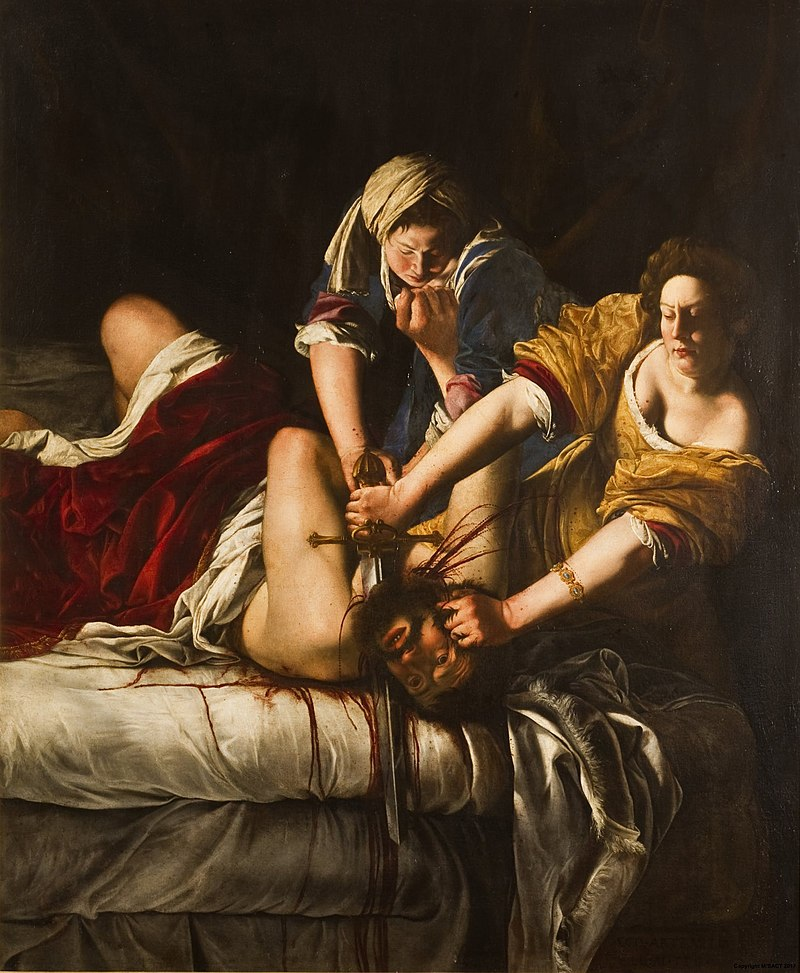

In [14]:
image

In [17]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

{'<CAPTION>': 'A painting of a man laying on a bed next to a woman.'}

In [18]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[375.6000061035156, 607.6384887695312, 473.20001220703125, 697.1544799804688], [658.0, 274.87249755859375, 732.4000244140625, 377.0375061035156], [383.6000061035156, 224.27650451660156, 457.20001220703125, 288.4945068359375], [1.2000000476837158, 235.95249938964844, 775.6000366210938, 723.4254760742188], [0.4000000059604645, 291.4134826660156, 523.6000366210938, 723.4254760742188], [343.6000061035156, 234.9794921875, 774.7999877929688, 694.2354736328125], [290.8000183105469, 151.30149841308594, 582.0, 497.6894836425781]], 'labels': ['human face', 'human face', 'human face', 'woman', 'woman', 'woman', 'woman']}}


In [19]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches  
def plot_bbox(image, data):
   # Create a figure and axes  
    fig, ax = plt.subplots()  
      
    # Display the image  
    ax.imshow(image)  
      
    # Plot each bounding box  
    for bbox, label in zip(data['bboxes'], data['labels']):  
        # Unpack the bounding box coordinates  
        x1, y1, x2, y2 = bbox  
        # Create a Rectangle patch  
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')  
        # Add the rectangle to the Axes  
        ax.add_patch(rect)  
        # Annotate the label  
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))  
      
    # Remove the axis ticks and labels  
    ax.axis('off')  
      
    # Show the plot  
    plt.show()  

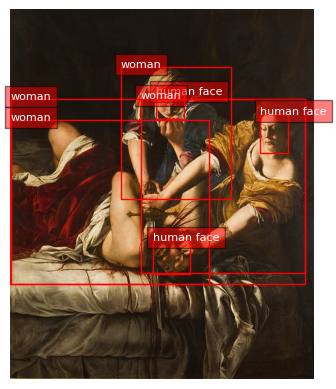

In [20]:
plot_bbox(image, results['<OD>'])

In [ ]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt)
print(results)

In [ ]:
plot_bbox(image, results['<DENSE_REGION_CAPTION>'])

In [31]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="woman face not holding a sword")
print(results)

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[342.8000183105469, 234.00650024414062, 774.7999877929688, 659.20751953125], [346.0, 447.093505859375, 403.6000061035156, 601.8004760742188]], 'labels': ['woman face', 'a sword']}}


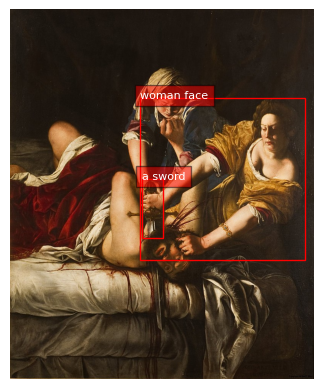

In [32]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])